In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(r'house_rental_data.csv.txt', index_col = 0)

In [3]:
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

<AxesSubplot:>

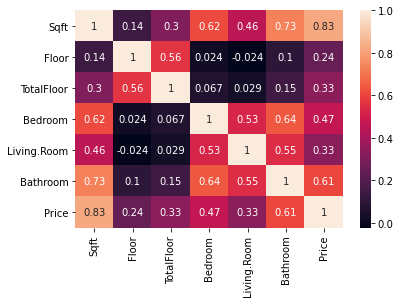

In [5]:
corr = df.corr()
sns.heatmap(corr, annot = True)

Lets find out the optimum number of clusters

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []

for i in range(1,15):
    k_means = KMeans(n_clusters = i,init = 'k-means++', random_state = 4)
    k_means.fit(df)
    wcss.append(k_means.inertia_)

E:\Software\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


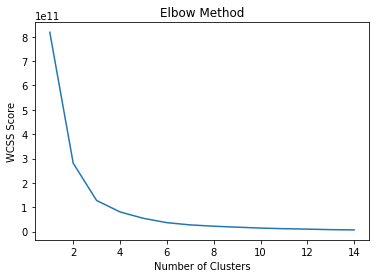

In [8]:

import matplotlib.pyplot as plt
plt.plot(range(1,15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS Score')    
plt.show()

In [9]:
k_means = KMeans(n_clusters = 6, init = 'k-means++', random_state = 4)
k_means.fit(df)
print(k_means.labels_)

[3 3 2 2 2 1 2 2 2 3 0 0 0 2 2 5 2 0 5 0 1 5 2 5 4 5 4 1 0 0 3 3 2 2 2 2 2
 2 4 0 1 2 0 3 3 2 2 3 4 0 3 3 0 0 4 3 0 0 0 2 0 0 2 2 0 0 0 0 0 2 0 0 5 0
 0 3 2 0 5 0 2 0 2 2 2 2 1 2 3 3 3 3 2 3 2 2 3 3 2 3 3 2 5 1 1 5 3 0 2 3 2
 2 5 3 5 2 1 0 0 0 2 2 3 3 1 2 2 5 0 0 3 2 5 0 5 2 0 3 3 5 1 2 2 2 0 0 5 4
 0 2 5 3 2 2 2 0 2 2 0 2 3 2 0 4 2 5 5 5 2 0 2 3 5 1 0 3 5 0 2 0 0 2 1 2 0
 0 0 2 2 3 2 0 3 2 2 3 3 0 2 0 0 3 2 0 2 2 2 0 3 3 2 0 3 2 2 2 2 1 0 5 2 2
 5 0 1 2 0 2 3 2 3 3 5 3 2 0 2 2 2 3 2 2 1 2 1 2 1 2 1 2 5 2 3 2 2 0 3 2 3
 2 0 0 2 2 0 0 0 0 0 2 2 3 0 0 0 0 0 5 5 2 0 2 2 2 5 2 4 5 2 5 2 0 1 2 2 3
 5 5 5 4 3 2 2 3 2 2 5 2 2 0 3 0 2 0 2 2 3 3 5 3 2 2 1 3 0 3 2 4 2 2 2 3 0
 1 3 0 2 0 0 3 2 0 2 2 0 0 0 1 0 2 2 0 5 2 2 3 2 3 3 5 2 3 2 0 0 0 5 3 2 0
 0 0 2 2 2 0 0 3 2 3 5 3 3 2 2 3 5 0 2 0 2 1 3 0 2 5 3 0 0 0 0 3 3 0 0 0 0
 0 0 2 0 0 0 2 0 2 2 1 0 0 0 2 2 5 5 3 5 4 2 0 3 5 2 2 5 4 2 0 3 2 0 2 3 1
 5 1 5 2 2 0 2 0 0 0 0 2 0 2 2 2 3 2 2 5 0 0 2 1 0 4 5 5 5 2 5 2 2 2 0 2 5
 5 3 5 3 2 0 0 2 2 0 1 5 

In [10]:
df['cluster'] = k_means.labels_

<AxesSubplot:xlabel='Floor', ylabel='Price'>

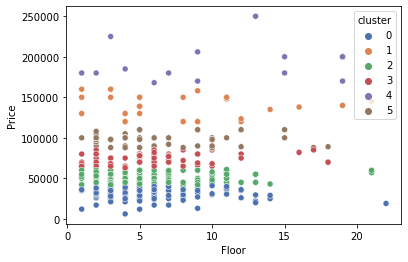

In [11]:
sns.scatterplot(x = df['Floor'], y = df['Price'], hue = df['cluster'], palette="deep")

<AxesSubplot:xlabel='TotalFloor', ylabel='Price'>

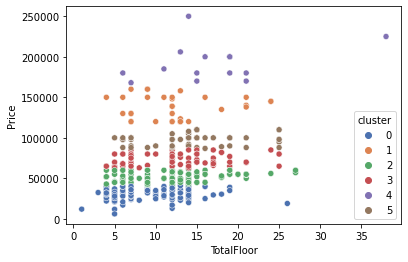

In [12]:
sns.scatterplot(x = df['TotalFloor'], y = df['Price'], hue = df['cluster'], palette="deep")

<AxesSubplot:xlabel='Sqft', ylabel='Price'>

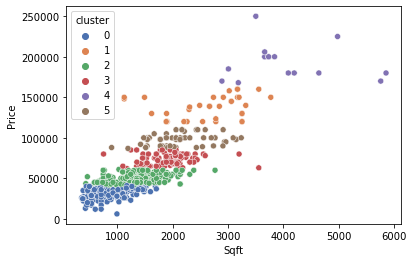

In [13]:
sns.scatterplot(x = df['Sqft'], y = df['Price'], hue = df['cluster'], palette="deep")

<AxesSubplot:xlabel='Bathroom', ylabel='Price'>

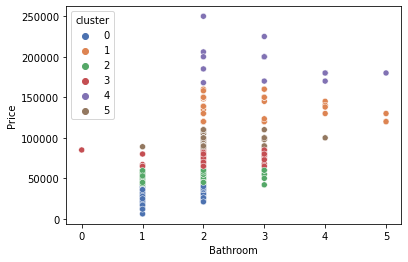

In [14]:
sns.scatterplot(x = df['Bathroom'], y = df['Price'], hue = df['cluster'], palette="deep")